**Diabetes Analysis**

Objective Goals:

1.   To determine the factors that affect diabetes
2.   To predict whether someone has diabetes



# Load Package and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [4]:
df.shape

(70692, 22)

# Data Cleaning

In [5]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
df.duplicated().sum()

1635

In [7]:
#Drop duplicate values
df=df.drop_duplicates()

In [8]:
df.shape

(69057, 22)

#Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth              69

In [10]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [11]:
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

Diabetes_binary: 
[0. 1.]

HighBP: 
[1. 0.]

HighChol: 
[0. 1.]

CholCheck: 
[1. 0.]

BMI: 
[26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]

Smoker: 
[0. 1.]

Stroke: 
[0. 1.]

HeartDiseaseorAttack: 
[0. 1.]

PhysActivity: 
[1. 0.]

Fruits: 
[0. 1.]

Veggies: 
[1. 0.]

HvyAlcoholConsump: 
[0. 1.]

AnyHealthcare: 
[1. 0.]

NoDocbcCost: 
[0. 1.]

GenHlth: 
[3. 1. 2. 4. 5.]

MentHlth: 
[ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]

PhysHlth: 
[30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]

DiffWalk: 
[0. 1.]

Sex: 
[1. 0.]

Age: 
[ 4. 12. 13. 11.  8.  1.  6.

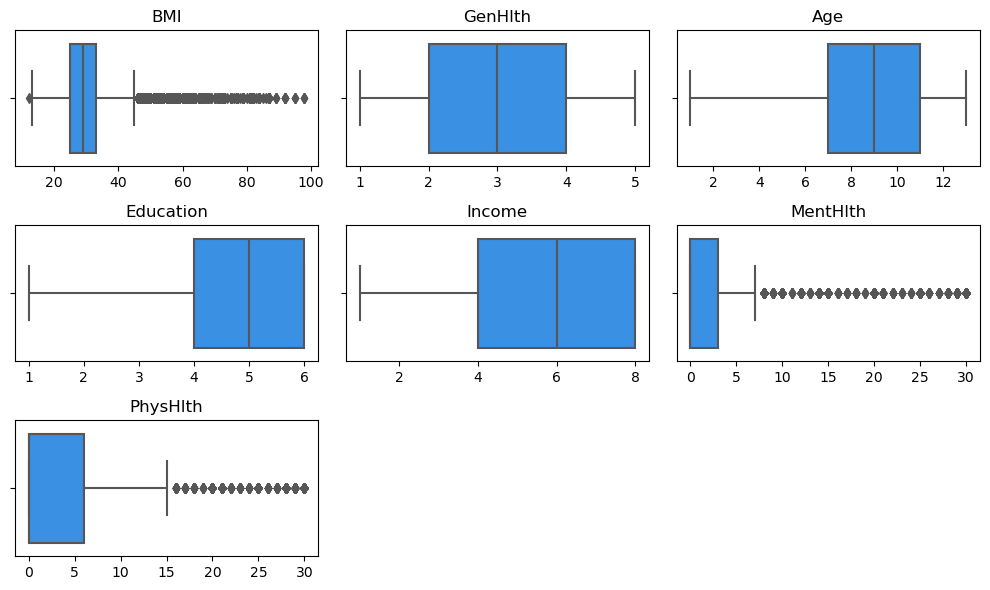

In [12]:
# Boxplot for non biner features
plt.figure(figsize=(10,6))
non_biner=['BMI','GenHlth','Age','Education','Income','MentHlth','PhysHlth']

for i, column in enumerate(non_biner, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=column, data=df, color='dodgerblue')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [13]:
#Outlier Percentage
def calculate_outlier_percentage(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    total_data = df.shape[0]
    percentage_outliers = (outliers_count / total_data) * 100
    return percentage_outliers

outliers_info = {}
for column in ['BMI', 'MentHlth', 'PhysHlth']:
    outliers_info[column] = calculate_outlier_percentage(df, column)

target = pd.DataFrame(list(outliers_info.items()), columns=['Feature', 'Percentage of Outliers'])
target['Percentage of Outliers'] = target['Percentage of Outliers'].round(2)
print(target)

    Feature  Percentage of Outliers
0       BMI                    3.16
1  MentHlth                   15.50
2  PhysHlth                   15.38


Observations

*   Data contains 70,692 rows and 22 columns
*   There are 15 columns with binary data (0,1) : Diabetes_binary, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost,DiffWalk, Sex
*   There is one continuous data, BMI
*   There are 4 columns with ordinal data : GenHlth, Age, Education, Income
*   There is 2 columns with descrete data : MentHlth, PhysHlth
*   There are many outliers in feature BMI, MnthHlth, and PhysHlth







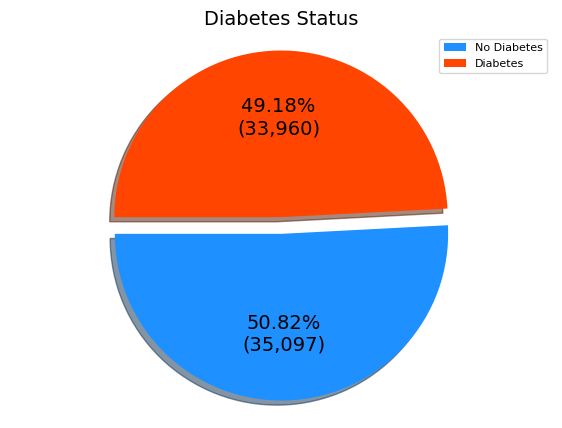

In [14]:
diabet_counts = df['Diabetes_binary'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(diabet_counts,
        autopct=lambda p: f'{p:.2f}%\n({int(p * sum(diabet_counts) / 100):,})',
        explode=[0.1, 0],
        labels=None,
        shadow=True,
        textprops={'fontsize': 14},
        colors=['dodgerblue', 'orangered'],
        startangle=180)
plt.title('Diabetes Status', fontsize=14)
plt.legend(['No Diabetes', 'Diabetes'], fontsize=8, loc='upper right')
plt.axis('equal')
plt.show()

There are 49.18% respondents who have diabetes, and 50.82% don't have diabetes. It means that the dataset is quite balance

c:\Users\Nurul Khasanah\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


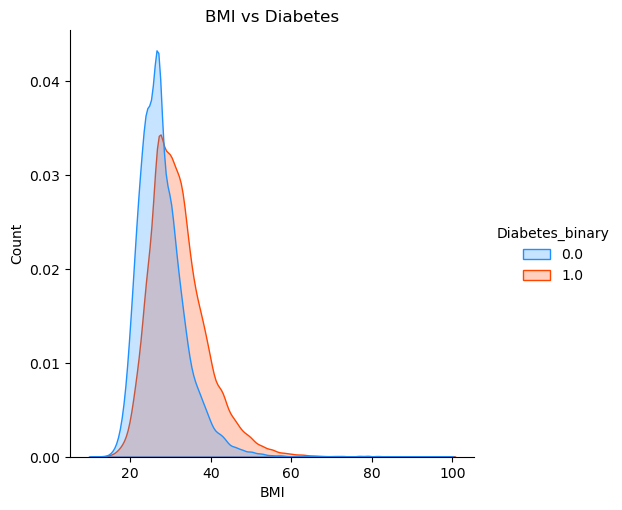

In [15]:
#BMI distribution
colors=['dodgerblue', 'orangered']
sns.displot(df, x="BMI", hue="Diabetes_binary", kind="kde", palette=colors,fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

c:\Users\Nurul Khasanah\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nurul Khasanah\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


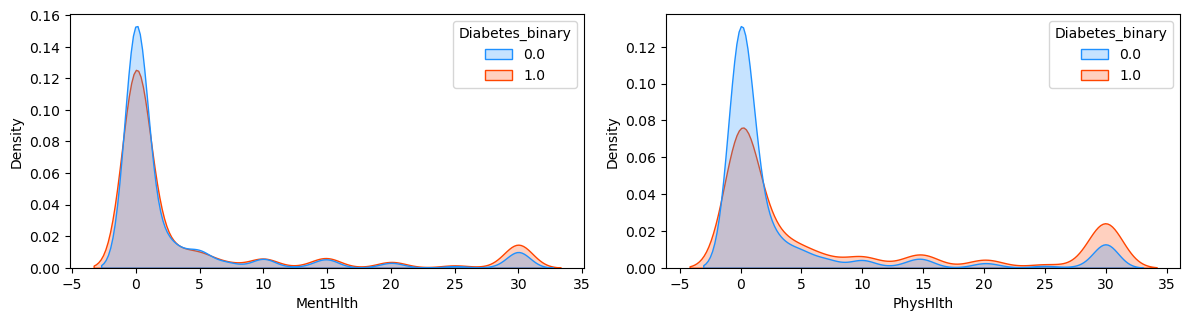

In [16]:
#Descrete Features Plot
plt.figure(figsize=(12,6))

features = ['MentHlth', 'PhysHlth']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], hue='Diabetes_binary', palette=colors,data=df, fill=True)
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

## Are people who have high cholesterol and high blood pressure susceptible to diabetes?

In [17]:
df['group'] = df.apply(lambda row: f"BP:{row['HighBP']}-Chol:{row['HighChol']}", axis=1)

In [18]:
prevalence = df.groupby('group')['Diabetes_binary'].mean().reset_index()
prevalence.columns = ['group', 'prevalence']

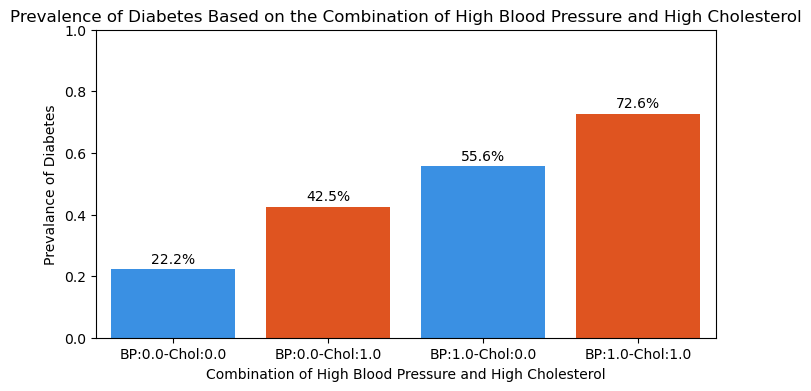

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(x='group', y='prevalence', data=prevalence, palette=colors)
for index, row in prevalence.iterrows():
    plt.text(index, row['prevalence'] + 0.02, f"{row['prevalence']*100:.1f}%", ha='center')
plt.title('Prevalence of Diabetes Based on the Combination of High Blood Pressure and High Cholesterol')
plt.xlabel('Combination of High Blood Pressure and High Cholesterol')
plt.ylabel('Prevalance of Diabetes')
plt.ylim(0, 1)
plt.show()

# Data Pre processing

In [20]:
df=df.drop(['group'],axis=1)

In [21]:
#Drop Cholcheck=0
df = df[df['CholCheck'] != 0]

In [22]:
df.shape

(67317, 22)

In [23]:
#Drop Cholchek
df=df.drop(['CholCheck'],axis=1)

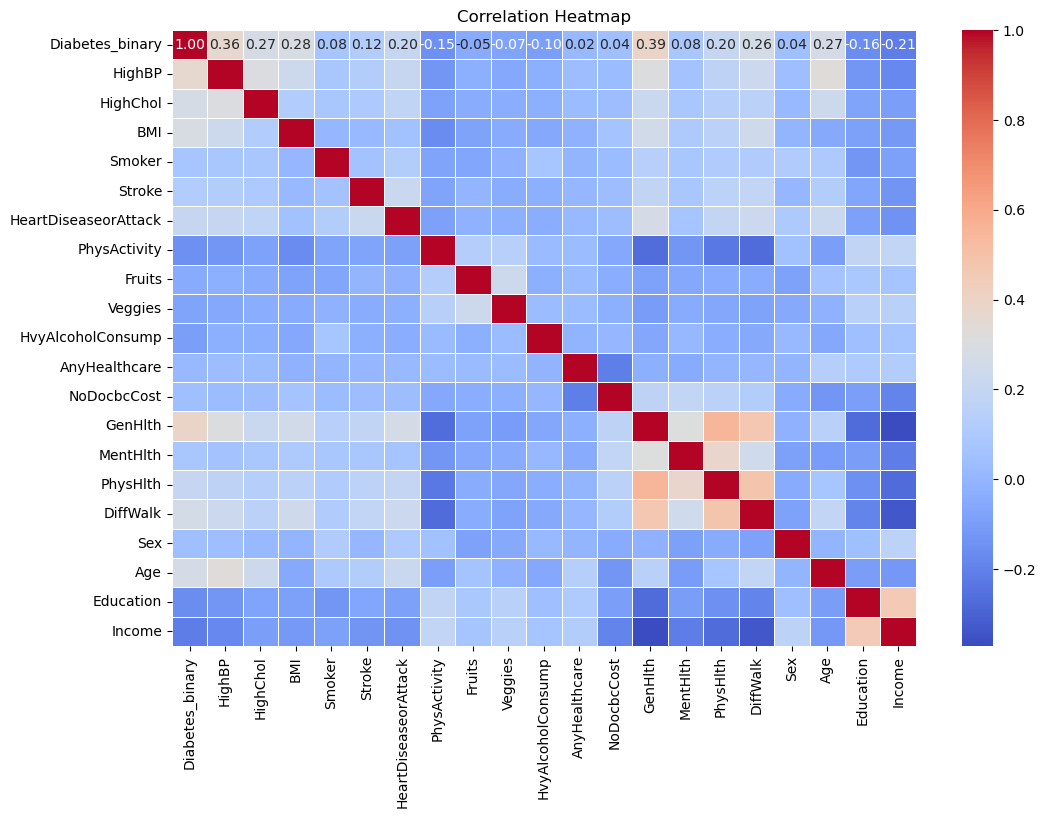

In [24]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = df.drop(['Diabetes_binary'],axis=1)
X = add_constant(X)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,HighBP,1.326610
2,HighChol,1.161452
3,BMI,1.170568
4,Smoker,1.076220
5,Stroke,1.091595
6,HeartDiseaseorAttack,1.190057
7,PhysActivity,1.159091
8,Fruits,1.095340
9,Veggies,1.098271
10,HvyAlcoholConsump,1.023087


In [26]:
selected_features_corr = correlation_matrix['Diabetes_binary'].abs().sort_values(ascending=False)
selected_features_corr_df = pd.DataFrame(selected_features_corr)
selected_features_corr_df.columns = ['Correlation']
selected_features_corr_df

,Correlation
Diabetes_binary,1.000000
GenHlth,0.393242
HighBP,0.364730
BMI,0.283732
HighChol,0.273975
Age,0.266386
DiffWalk,0.263705
Income,0.214717
PhysHlth,0.203523
HeartDiseaseorAttack,0.202517


In [27]:
df=df.drop(['Sex','Fruits','NoDocbcCost','AnyHealthcare'],axis=1)

In [28]:
df.shape

(67317, 17)

In [29]:
target = diabet_counts.reset_index()
target.rename(columns={'index': 'Diabetes_binary', 'count': 'freq'}, inplace=True)
target['percentage'] = round((target['freq'] / target['freq'].sum()) * 100, 2)

print(target)

   Diabetes_binary   freq  percentage
0              1.0  35097       50.82
1              0.0  33960       49.18


## Feature Scalling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

## Split Data

In [31]:
#Split Fitur and Target
X = df_scaled.drop(['Diabetes_binary'],axis=1)
y = df_scaled['Diabetes_binary']

In [32]:
#Split Data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53853, 16), (13464, 16), (53853,), (13464,))

# Machine Learning Modelling

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_log_model=log_model.predict(X_test)

In [36]:
#Random Forest Classifier
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred_rf=rf.predict(X_test)

In [38]:
#XGBoost Classifier
xgb_clf= XGBClassifier(random_state = 1000)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

In [39]:
y_pred_xgb=xgb_clf.predict(X_test)

# Model Evaluation

In [40]:
from sklearn.metrics import classification_report
print('===============================================================================')
print('Classification Report of Machine Learning Model without Hyperparameter Tunning')
print('===============================================================================')
print('Logistic Regression')
print(classification_report(y_test, y_pred_log_model, digits=6))
print('\n')
print('Random Forest Classification')
print(classification_report(y_test, y_pred_rf, digits=6))
print('\n')
print('XGBoost Classification')
print(classification_report(y_test, y_pred_xgb, digits=6))

Classification Report of Machine Learning Model without Hyperparameter Tunning
Logistic Regression
              precision    recall  f1-score   support

         0.0   0.743128  0.704732  0.723421      6445
         1.0   0.741159  0.776321  0.758333      7019

    accuracy                       0.742053     13464
   macro avg   0.742144  0.740527  0.740877     13464
weighted avg   0.742102  0.742053  0.741621     13464



Random Forest Classification
              precision    recall  f1-score   support

         0.0   0.730612  0.666563  0.697120      6445
         1.0   0.716640  0.774327  0.744368      7019

    accuracy                       0.722742     13464
   macro avg   0.723626  0.720445  0.720744     13464
weighted avg   0.723328  0.722742  0.721751     13464



XGBoost Classification
              precision    recall  f1-score   support

         0.0   0.757487  0.678976  0.716086      6445
         1.0   0.730844  0.800399  0.764042      7019

    accuracy               

## Feature Importance Analyis

In [41]:
import dalex as dx
import scikitplot as skplt
import shap

In [42]:
## Initiate explainer for XGBoost model
diabetes_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 53853 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 53853 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x000001BA1998ED40> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00126, mean = 0.517, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.96, mean = 2.88e-05, max = 0.988
  -> model_info        : package xgboost

A new explainer has been created!


In [43]:
diabetes_xgb_exp.model_parts().plot()

## Deployment Model

In [44]:
import pickle

In [45]:
with open('xgb_clf.pkl', 'wb') as file:
    pickle.dump(xgb_clf, file)